In [2]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
from matplotlib import mlab
import matplotlib.pyplot as plt

In [4]:
fs = 10e3
N = 1e5
NFFT = 1024
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

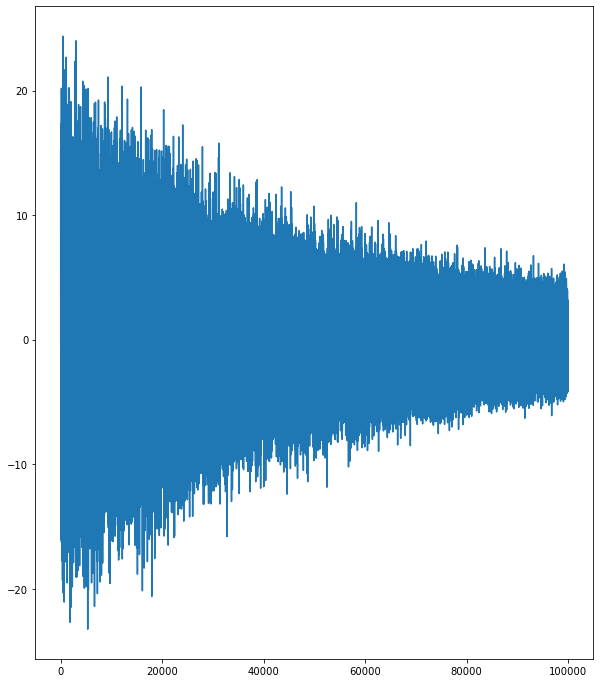

In [5]:
plt.figure(figsize=(10,12))
plt.plot(x)

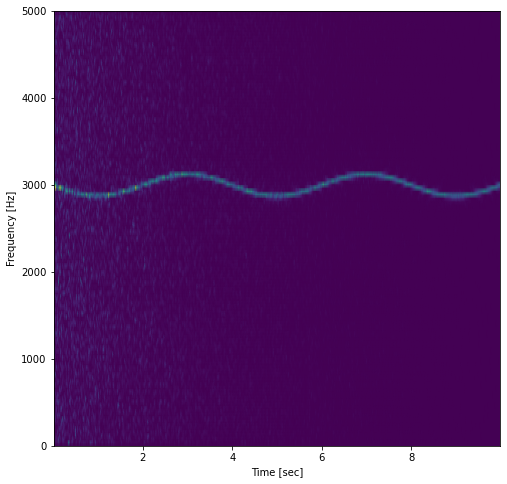

In [13]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(8,8))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig('/home/ashok/ml_gw_imageclassifier/plots/img.png')

In [16]:
img = plt.imread('/home/ashok/ml_gw_imageclassifier/plots/img.png')

In [17]:
rows,cols,colors = img.shape # gives dimensions for RGB array
img_size = rows*cols*colors
img_1D_vector = img.reshape(img_size)
# you can recover the orginal image with:
img2 = img_1D_vector.reshape(rows,cols,colors)

In [18]:
img_1D_vector

array([1., 1., 1., ..., 1., 1., 0.], dtype=float32)

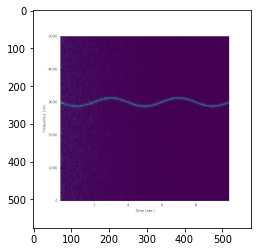

In [20]:
plt.imshow(img2) 